## Time Series Data Prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load time series data
pitching = pd.read_csv('mlb_pitching.csv')
pitching.head()

,Year,Tms,#P,PAge,R/G,ERA,G,GF,CG,SHO,...,WP,BF,WHIP,BAbip,H9,HR9,BB9,SO9,SO/W,E
0,1871,9,19,24.3,10.47,4.22,254,0.09,0.91,0.02,...,0.82,44.15,1.553,0.288,12.4,0.2,1.6,0.7,0.45,7.61
1,1872,11,21,21.2,9.26,3.65,366,0.11,0.89,0.03,...,0.55,43.52,1.439,0.288,12.2,0.1,0.7,0.7,1.01,7.50
2,1873,9,25,21.3,8.99,3.40,398,0.09,0.91,0.02,...,0.31,43.45,1.468,0.293,12.4,0.1,0.8,0.7,0.83,8.02
3,1874,8,17,24.7,7.48,2.19,464,0.05,0.95,0.03,...,0.27,41.69,1.310,0.277,11.3,0.1,0.5,0.8,1.50,8.14
4,1875,13,42,24.3,6.14,2.23,690,0.10,0.90,0.07,...,0.48,39.25,1.141,0.259,9.9,0.1,0.4,1.0,2.71,6.96


In [2]:
# Make sure the Year is in datetime format
pitching['Year'] = pd.to_datetime(pitching['Year'], format='%Y')
# If not sorted (it is here)
# pitching = pitching.sort_values(by = 'Year')
# And setting it as the index, then extracting the single feature we want to predict (and dropping an NAs from it)
strikeout = pitching[['Year', 'SO9']]
strikeout.set_index('Year', inplace = True)
strikeout = strikeout.dropna()
# There are no NA here, if there were, after dropping we could downsample:
# check out the .resample function from Pandas to see the options: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
# strikeout = strikeout.resample('7YE').mean().reset_index(drop=False)
strikeout.head()

,SO9
Year,
1871-01-01,0.7
1872-01-01,0.7
1873-01-01,0.7
1874-01-01,0.8
1875-01-01,1.0


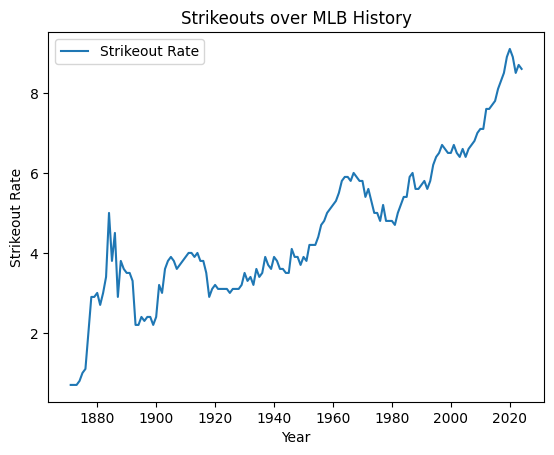

In [3]:
# visualize the time series
plt.plot(strikeout['SO9'], label='Strikeout Rate')
plt.xlabel('Year')
plt.ylabel('Strikeout Rate')
plt.legend()
plt.title('Strikeouts over MLB History')
plt.show();

In [4]:
data = pd.read_csv('nvidia_jan25.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.sort_values(by = 'Date')
data.set_index('Date', inplace = True)
data = data.dropna()
data.head()

,Close
Date,
2025-01-02,138.31
2025-01-03,144.47
2025-01-06,149.43
2025-01-07,140.14
2025-01-08,140.11


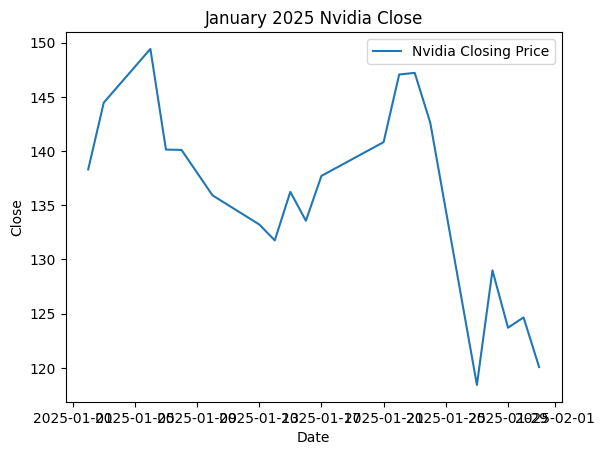

In [5]:
# visualize the time series
plt.plot(data['Close'], label='Nvidia Closing Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.title('January 2025 Nvidia Close')
plt.show();

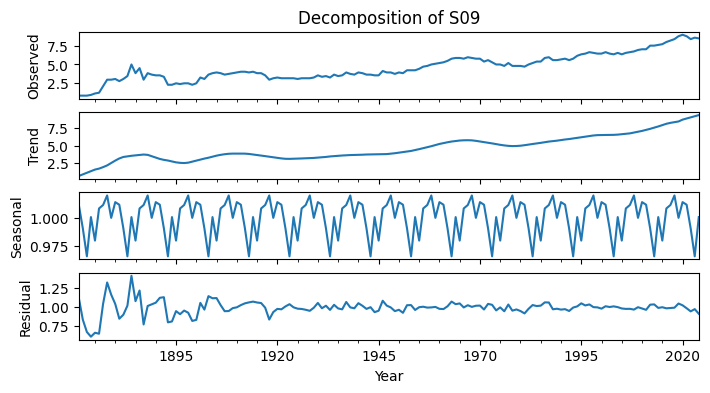

In [6]:
# Checking out the decompositions
from statsmodels.tsa.seasonal import seasonal_decompose

# setting the period makes the assumption that the seasonal trend should happen every "period" units (e.g. 10 years, or 5 days)
# can change model='multiplicative' to see if there's a change in seasonal trend
decomp1 = seasonal_decompose(strikeout['SO9'], period=10, model='multiplicative', extrapolate_trend='freq')
decomp2 = seasonal_decompose(data['Close'], period=5, model='additive', extrapolate_trend='freq')

fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(8,4))
ax[0].set_title('Decomposition of S09')
decomp1.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')

decomp1.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')

decomp1.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')

decomp1.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')

plt.show();

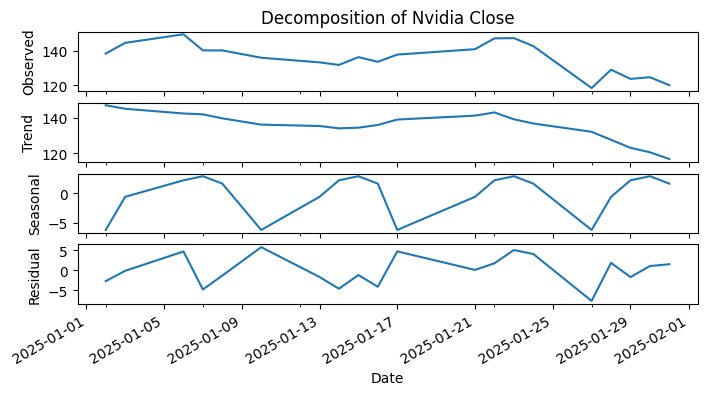

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(8,4))
ax[0].set_title('Decomposition of Nvidia Close')
decomp2.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')

decomp2.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')

decomp2.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')

decomp2.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')

plt.show();

### Lag and ACF Plots

In [8]:
# Creating "lag" features (to do the analysis manually)
# If we want to predict the SO9 next year given 1 lag (the previous year)
# pitching['Lag 1'] = pitching['SO9'].shift(1)
# If you want to explore different lags (say from 1 year up to 10 previous years)
for i in range(1, 11):
    strikeout[f'Lag {i}'] = strikeout['SO9'].shift(i)

# there will be some missing values for the early years, since we don't have (e.g.) 1870 to predict 1871
# this means (with a maximum lag of 10 to investigate) we lost years 1871-1880:
strikeout = strikeout.dropna()
strikeout.head()

,SO9,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,Lag 8,Lag 9,Lag 10
Year,,,,,,,,,,,
1881-01-01,2.7,3.0,2.9,2.9,2.0,1.1,1.0,0.8,0.7,0.7,0.7
1882-01-01,3.0,2.7,3.0,2.9,2.9,2.0,1.1,1.0,0.8,0.7,0.7
1883-01-01,3.4,3.0,2.7,3.0,2.9,2.9,2.0,1.1,1.0,0.8,0.7
1884-01-01,5.0,3.4,3.0,2.7,3.0,2.9,2.9,2.0,1.1,1.0,0.8
1885-01-01,3.8,5.0,3.4,3.0,2.7,3.0,2.9,2.9,2.0,1.1,1.0


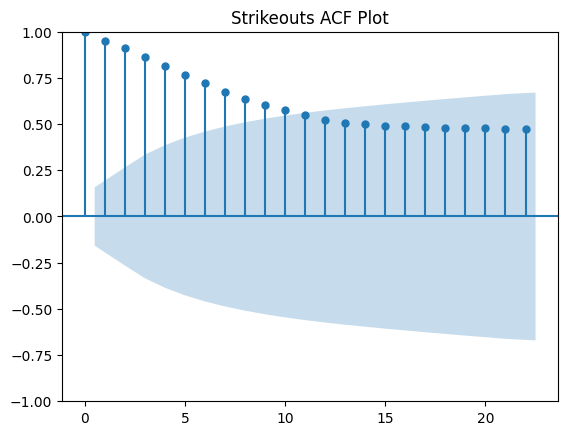

In [9]:
# Autocorrelation Function
# This is used to determine the appropriate lag
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# use the original data
series = pitching['SO9']
plot_acf(series, title = 'Strikeouts ACF Plot')
plt.show();
# Looks like even up to a lag of 10 could provide significant information about the ensuing years

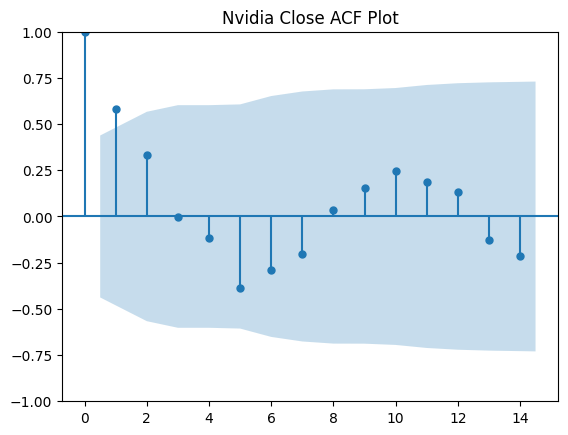

In [10]:
# meanwhile, for Nvidia stock, seems like the data are only really correlated up to a lag of 2
series = data['Close']
plot_acf(series, title = 'Nvidia Close ACF Plot')
plt.show();

In [11]:
# Split into training and test sets; since we are looking at time series; we are NOT randomly splitting the data
# Take instead the first 80% for the training, then we'll see if the first 80% of MLB history can be used to predict the next 20%
train_size = int(.8 * len(strikeout))
train_data = strikeout[:train_size]
test_data = strikeout[train_size:]

# put the y feature (the current SO9) in arrays
y_train = np.array(train_data['SO9']).reshape(-1,1)
y_test = np.array(test_data['SO9']).reshape(-1,1)

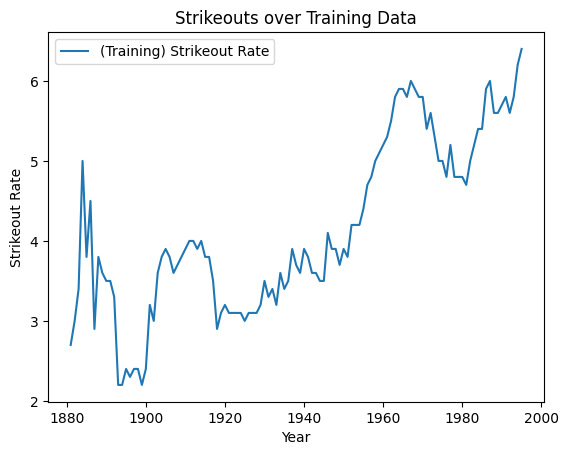

In [12]:
# visualize the time series
plt.plot(train_data['SO9'], label='(Training) Strikeout Rate')
plt.xlabel('Year')
plt.ylabel('Strikeout Rate')
plt.legend()
plt.title('Strikeouts over Training Data')
plt.show();

In [13]:
# We can confirm the values of the ACF using the correlation function
# For example, confirm that Lag 10 still has a large correlation
pitching['SO9'].corr(pitching['SO9'].shift(10))

0.8089513136299691

## Fitting AR(p) Models by Hand and using `statsmodels`

### By Hand

In [14]:
# However, let's start with a simple AR(1) model
X_train = np.array(train_data['Lag 1']).reshape(-1,1)
# If you want to add an intercept (since the default statsmodels package does so, and it can help make the model stable)
# X_train = np.hstack([np.array(train_data['Lag 1']).reshape(-1,1), np.ones(len(y_train)).reshape(-1,1)])
print(X_train.shape)
print(y_train.shape)

(115, 1)
(115, 1)


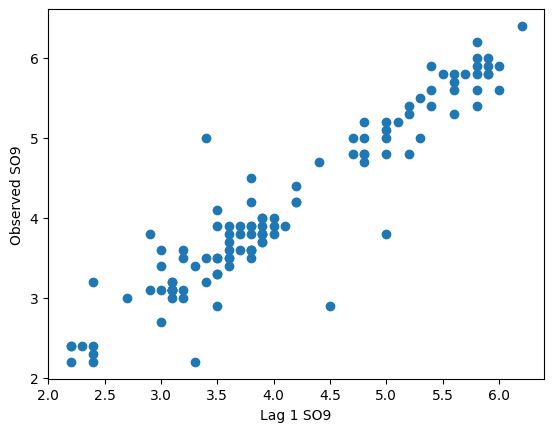

In [15]:
# we already know there should be a correlation at lag 1, let's confirm with a plot
# should mean that AR(1) is not too bad, given the training data
plt.scatter(x = X_train, y = y_train)
plt.xlabel('Lag 1 SO9')
plt.ylabel('Observed SO9')
plt.show();

In [16]:
# Fit the model using OLS:
w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))
w

array([[1.00410844]])

In [17]:
# Predictions
# Note; we assume we don't know anything except the previous year, so we iteratively use the predictions
y_pred = []
start = X_train[len(X_train)-1].reshape(-1,1)
for i in range(len(y_test)):
    y_pred.append(w.T.dot(start).flatten()[0])
    start = y_pred[i].reshape(-1,1) # without intercept
    # start = np.vstack([y_pred[i].flatten(), 1]) # with intercept
# This will probably result in not very good predictions...

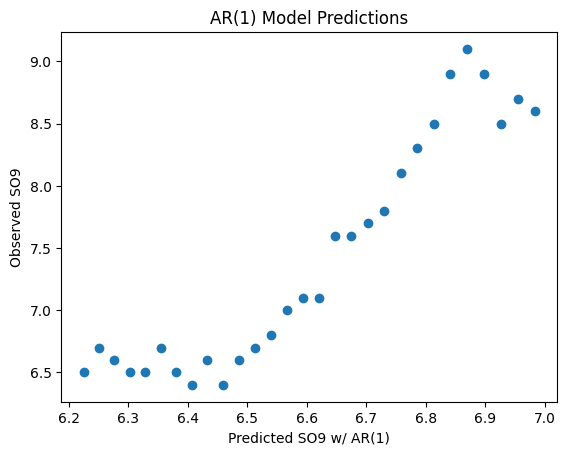

In [18]:
# observed versus predicted (one way)
plt.scatter(x = y_pred, y = y_test)
plt.xlabel('Predicted SO9 w/ AR(1)')
plt.ylabel('Observed SO9')
plt.title('AR(1) Model Predictions')
plt.show();

In [19]:
# observed versus predicted (another way, over time)
# put predictions into a data frame for plotting purposes
pred_data = pd.DataFrame({'Year': test_data.index, 'pred SO9': y_pred})
pred_data.set_index('Year', inplace = True)
pred_data.head()

,pred SO9
Year,
1996-01-01,6.225472
1997-01-01,6.251049
1998-01-01,6.276731
1999-01-01,6.302519
2000-01-01,6.328412


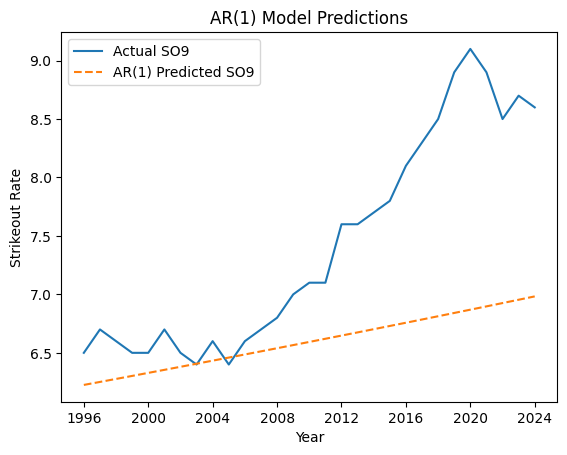

In [20]:
# make the plot
plt.plot(test_data['SO9'], label = 'Actual SO9')
plt.plot(pred_data['pred SO9'], label = 'AR(1) Predicted SO9', linestyle = '--')
plt.xlabel('Year')
plt.ylabel('Strikeout Rate')
plt.legend()
plt.title('AR(1) Model Predictions')
plt.show();

### `statsmodels`

In [21]:
# Using statsmodels AutoReg function
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.api import AutoReg

ar_model = AutoReg(y_train, lags=1, trend='n') # the default is to add an intercept (or, trend='c'), 
# using trend='n' is more in line with traditional AR(p) models, but may result in a nonstationary model
ar_results = ar_model.fit()

In [22]:
# get the parameters (should be very close to closed form)
# the difference is that AutoReg does not use OLS; it uses an MLE approach 
# (you should hopefully remember that from 4400, if not we may discuss it later; the short info is that MLE uses the data more efficiently)
# if the AutoReg function gives you very different parameters from the OLS, it is probably because n is not very large relative to p
ar_results.params

array([1.00456116])

In [23]:
# one benefit of this is that it is easy to check the roots of the model
# stability requires that the roots in modulus lie on or outside the unit circle (e.g. in AR(1), this should be greater than 1)
# but, if it's close to one, we can just handwave it for now...
ar_results.roots

array([0.99545955])

In [24]:
# the predictions
ar_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
pred_data2 = pd.DataFrame({'Year': test_data.index, 'pred SO9': ar_pred.flatten()})
pred_data2.set_index('Year', inplace = True)
pred_data2.head()

,pred SO9
Year,
1996-01-01,6.429191
1997-01-01,6.458516
1998-01-01,6.487974
1999-01-01,6.517567
2000-01-01,6.547295


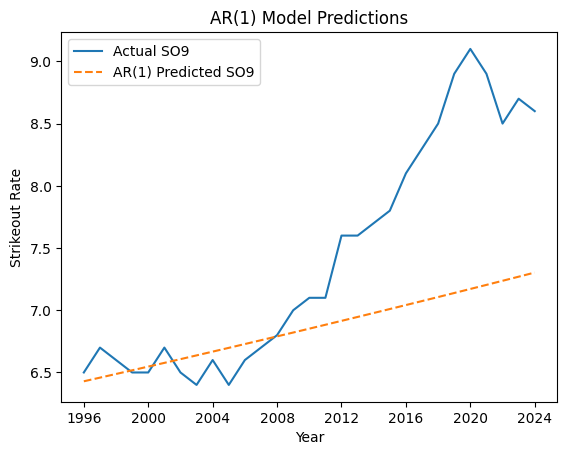

In [25]:
# make the plot
plt.plot(test_data['SO9'], label = 'Actual SO9')
plt.plot(pred_data2['pred SO9'], label = 'AR(1) Predicted SO9', linestyle = '--')
plt.xlabel('Year')
plt.ylabel('Strikeout Rate')
plt.legend()
plt.title('AR(1) Model Predictions')
plt.show();

In [26]:
# Probably we want to use a larger lag; say 10?
# Could do it manually, but we just confirmed that we know how AutoReg works, so...
ar_model = AutoReg(y_train, lags=10, trend='n')
ar_results = ar_model.fit()

In [27]:
# can get all the important info in a single function call
# to ensure stability, make sure all the Modulus values are > 1
ar_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                    AutoReg(10)   Log Likelihood                   2.946
Method:               Conditional MLE   S.D. of innovations              0.235
Date:                Tue, 04 Feb 2025   AIC                             16.108
Time:                        14:41:08   BIC                             45.301
Sample:                            10   HQIC                            27.937
                                  115                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           0.9527      0.096      9.932      0.000       0.765       1.141
y.L2           0.1329      0.134      0.994      0.320      -0.129       0.395
y.L3           0.0801      0.129      0.620      0.535      -0.173       0.333
y.L4          -0.1740      0.113     -1.547      0.122      -0.395       0.047
y.L5          -0.0437      0.108     -0.407      0.684      -0.255       0.167
y.L6           0.2347      0.106      2.209      0.027       0.026       0.443
y.L7          -0.1208      0.096     -1.261      0.207      -0.308       0.067
y.L8          -0.1790      0.095     -1.878      0.060      -0.366       0.008
y.L9          -0.0122      0.085     -0.143      0.886      -0.180       0.155
y.L10          0.1357      0.070      1.931      0.054      -0.002       0.273
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9932           -0.0000j            0.9932           -0.0000
AR.2             1.1593           -0.3402j            1.2082           -0.0454
AR.3             1.1593           +0.3402j            1.2082            0.0454
AR.4             0.5833           -1.0258j            1.1800           -0.1677
AR.5             0.5833           +1.0258j            1.1800            0.1677
AR.6            -0.4200           -1.0959j            1.1736           -0.3082
AR.7            -0.4200           +1.0959j            1.1736            0.3082
AR.8            -1.3066           -0.0000j            1.3066           -0.5000
AR.9            -1.1208           -0.8786j            1.4241           -0.3942
AR.10           -1.1208           +0.8786j            1.4241            0.3942
------------------------------------------------------------------------------
"""

In [28]:
# the predictions
ar_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
pred_data3 = pd.DataFrame({'Year': test_data.index, 'pred SO9': ar_pred.flatten()})
pred_data3.set_index('Year', inplace = True)
pred_data3.head()

,pred SO9
Year,
1996-01-01,6.543667
1997-01-01,6.742949
1998-01-01,6.758356
1999-01-01,6.810688
2000-01-01,6.962648


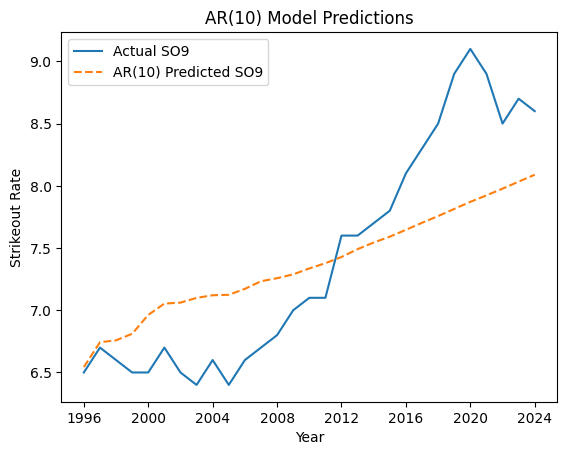

In [29]:
# make the plot
plt.plot(test_data['SO9'], label = 'Actual SO9')
plt.plot(pred_data3['pred SO9'], label = 'AR(10) Predicted SO9', linestyle = '--')
plt.xlabel('Year')
plt.ylabel('Strikeout Rate')
plt.legend()
plt.title('AR(10) Model Predictions')
plt.show();

In [30]:
# Still struggling when forecasting > 10 years (makes some sense)
# What about throwing up that lag?
ar_model = AutoReg(y_train, lags=20, trend='n')
ar_results = ar_model.fit()

In [31]:
# the predictions
ar_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
pred_data3 = pd.DataFrame({'Year': test_data.index, 'pred SO9': ar_pred.flatten()})
pred_data3.set_index('Year', inplace = True)
pred_data3.head()

,pred SO9
Year,
1996-01-01,6.502344
1997-01-01,6.526391
1998-01-01,6.384514
1999-01-01,6.348875
2000-01-01,6.385698


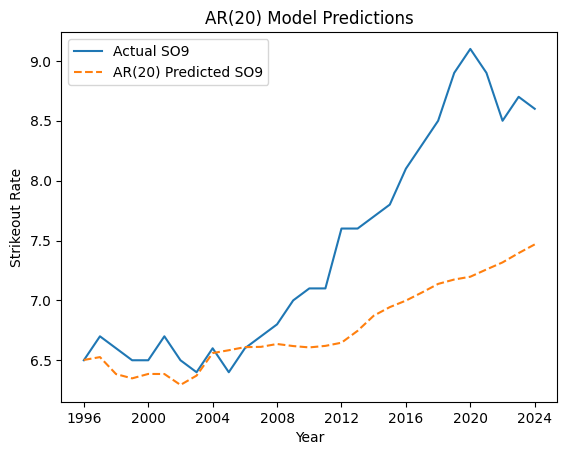

In [32]:
# make the plot
plt.plot(test_data['SO9'], label = 'Actual SO9')
plt.plot(pred_data3['pred SO9'], label = 'AR(20) Predicted SO9', linestyle = '--')
plt.xlabel('Year')
plt.ylabel('Strikeout Rate')
plt.legend()
plt.title('AR(20) Model Predictions')
plt.show();

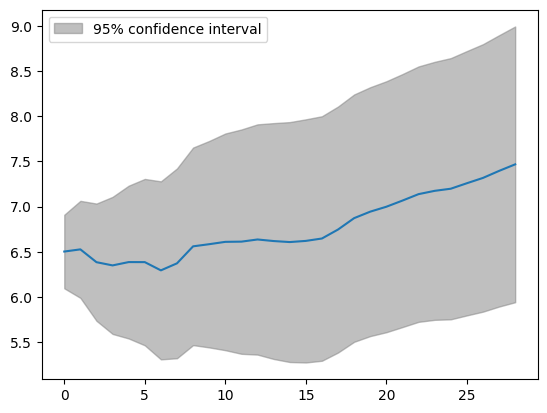

In [33]:
# this adds 95% confidence intervals around the predictions
# haven't figured out a way to overlay them on the truth yet though
ar_results.plot_predict(len(train_data), len(train_data) + len(test_data) - 1);

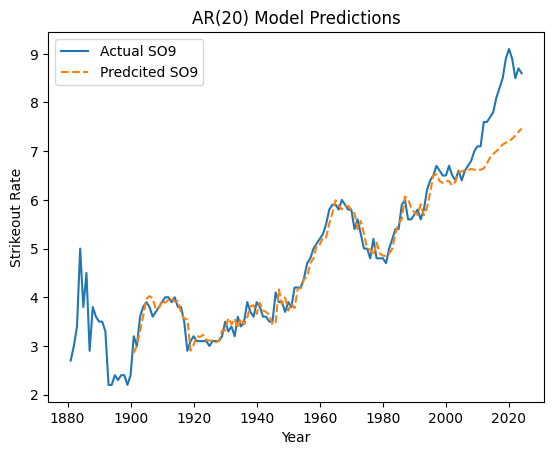

In [34]:
# Or, you could plot the entire history given predictions:
ar_pred_full = ar_results.predict(start=0, end=len(train_data) + len(test_data) - 1) # note we start at zero

plt.plot(strikeout['SO9'], label = 'Actual SO9')
plt.plot(strikeout.index, ar_pred_full, label = 'Predcited SO9', linestyle = '--')
plt.xlabel('Year')
plt.ylabel('Strikeout Rate')
plt.legend()
plt.title('AR(20) Model Predictions')
plt.show();

In [35]:
# We can also look at the MAE and RMSE, though these are only useful when comparing against other models
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 0.82
Root Mean Squared Error: 1.08


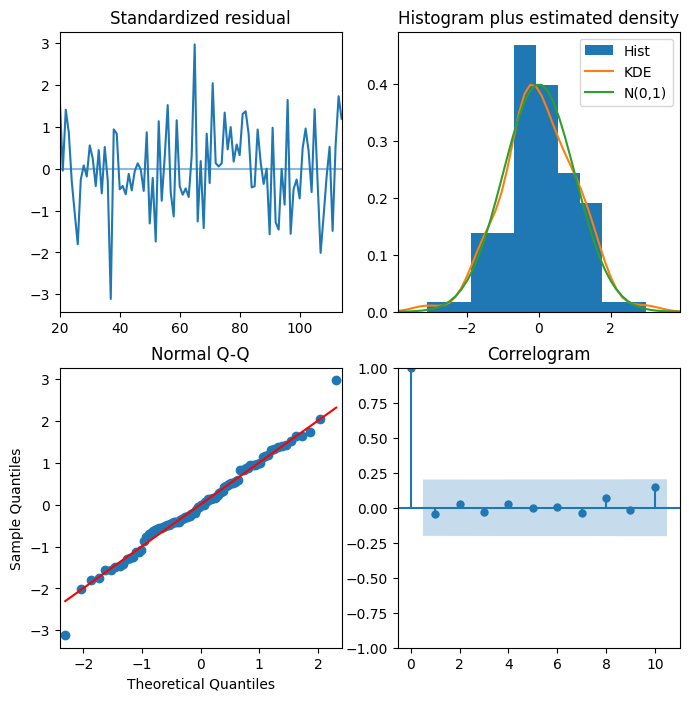

In [36]:
# since Time Series is a type of regression, we can check some diagnostic plots
# generally, you want to see random noise for the Standardized Resiudal, a normal histogram and QQ plot,
# and all lags > 0 to be within the control bounds
ar_results.plot_diagnostics(figsize=(8,8));

In [37]:
# This suggests that, given the information we had in the mid-90s, it would be very unlikely that anyone would have
# predicted the explosion of Strikeouts starting just 10 years later
# What about something that could possibly be better predicted?

### Practice (Airline Passenger Traffic Data)

## Fitting MA(q) Models using `statsmodels`

In [38]:
# The ARIMA function can fit both AR(p) and MA(q) models, as well as more complex ARMA(p,q) or ARIMA(p,d,q) models
# In the interest of time, we won't talk about combining them in class, but all you need to do to fit ARMA is to define the lag for both the
# Autoregressive Model (p) and the Moving Average Model (q) while setting the Integration filter (d=0)
from statsmodels.tsa.arima.model import ARIMA

# Regrabbing the pitching data
pitching = pd.read_csv('mlb_pitching.csv')
# Make sure the Year is in datetime format
pitching['Year'] = pd.to_datetime(pitching['Year'], format='%Y')
# If not sorted (it is here)
# pitching = pitching.sort_values(by = 'Year')
# And setting it as the index, then extracting the single feature we want to predict (and dropping an NAs from it)
strikeout = pitching[['Year', 'SO9']]
strikeout.set_index('Year', inplace = True)
strikeout = strikeout.dropna()
# There are no NA here, if there were, after dropping we could downsample:
# check out the .resample function from Pandas to see the options: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
# strikeout = strikeout.resample('7YE').mean().reset_index(drop=False)
strikeout.head()

,SO9
Year,
1871-01-01,0.7
1872-01-01,0.7
1873-01-01,0.7
1874-01-01,0.8
1875-01-01,1.0


In [39]:
# before we visualize, since we saw there was not perfect stationarity from the AR(1) model before
# what if we just practice differencing:
diff_y = []
for i in range(len(strikeout)-1):
    diff_y.append((strikeout.iloc[i+1,:] - strikeout.iloc[i,:]).iloc[0])

diff_y[:10]

[0.0,
 0.0,
 0.10000000000000009,
 0.19999999999999996,
 0.10000000000000009,
 0.8999999999999999,
 0.8999999999999999,
 0.0,
 0.10000000000000009,
 -0.2999999999999998]

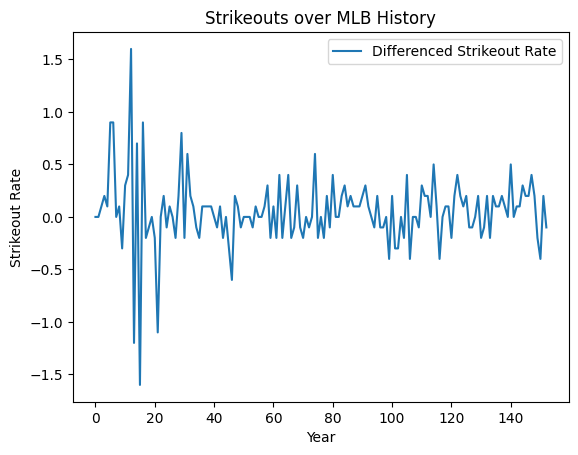

In [40]:
# visualize the (differenced) time series
plt.plot(diff_y, label='Differenced Strikeout Rate')
plt.xlabel('Year')
plt.ylabel('Strikeout Rate')
plt.legend()
plt.title('Strikeouts over MLB History')
plt.show();

In [41]:
# but, since we were pretty close to stationarity (based on the AR(1) model) and differencing makes the results less immediately interpretable,
# let's just stick with the original data to fit our MA(q) models

In [42]:
train_size = int(.8 * len(strikeout))
train_data = strikeout[:train_size]
test_data = strikeout[train_size:]

# put the y feature (the current SO9) in arrays
y_train = np.array(train_data['SO9']).reshape(-1,1)
y_test = np.array(test_data['SO9']).reshape(-1,1)

In [43]:
# For AR(p), you would do ARIMA(series, order=(p, 0, 0))
# For MA(q), you would do ARIMA(series, order=(0, 0, q))
# For ARIMA(p,q), it's ARIMA(series, order=(p, 0, q))
# And for ARIMA(p, d, q), it's ARIMA(series, order=(p,d,q))
# though you should investigate a little bit more outside of class just what combining them entails before trusting
# here's the docs: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
ma_model = ARIMA(y_train, order=(0, 0, 1)) # here is the MA(1) model
ma_results = ma_model.fit()

#summary of the model
ma_results.summary()
# Interpretation: coef. of the constant is 3.8981 which works as the mean of the dataset 
# coefficient of the noise value ma.L1 is .7172, but the P>|z| tells us that this has a significant impact on the output
# (note, if we used the differenced data, the constant is no longer interpretable as the mean/level of the series)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  123
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -151.021
Date:                Tue, 04 Feb 2025   AIC                            308.041
Time:                        14:41:10   BIC                            316.478
Sample:                             0   HQIC                           311.468
                                - 123                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8981      0.131     29.784      0.000       3.642       4.155
ma.L1          0.7172      0.050     14.345      0.000       0.619       0.815
sigma2         0.6783      0.091      7.466      0.000       0.500       0.856
===================================================================================
Ljung-Box (L1) (Q):                  37.95   Jarque-Bera (JB):                 3.91
Prob(Q):                              0.00   Prob(JB):                         0.14
Heteroskedasticity (H):               0.71   Skew:                            -0.44
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
# getting the predictions works the same as in AR(p)
# but note that MA(q) models are even worse at long-term broadcasting
# and that everything after order q=1 is simply predicted at the mean
ma_pred = ma_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
pred_data = pd.DataFrame({'Year': test_data.index, 'pred SO9': ma_pred.flatten()})
pred_data.set_index('Year', inplace = True)
pred_data.head()

,pred SO9
Year,
1994-01-01,4.809616
1995-01-01,3.898053
1996-01-01,3.898053
1997-01-01,3.898053
1998-01-01,3.898053


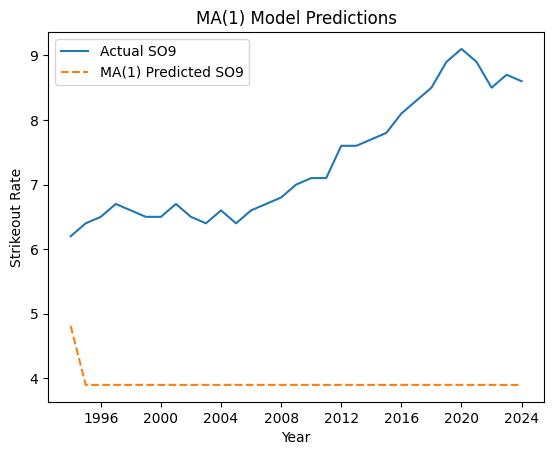

In [45]:
# make the plot
plt.plot(test_data['SO9'], label = 'Actual SO9')
plt.plot(pred_data['pred SO9'], label = 'MA(1) Predicted SO9', linestyle = '--')
plt.xlabel('Year')
plt.ylabel('Strikeout Rate')
plt.legend()
plt.title('MA(1) Model Predictions')
plt.show();

In [46]:
# what about increasing the order of the model?
# this will allow us to forecast q=10 lags out
ma_model = ARIMA(y_train, order=(0, 0, 10)) # here is the MA(10) model
ma_results = ma_model.fit()

# summary of the model
# note that because this is an iterative algorithm (like gradient descent)
# we may get warnings about starting values and failure to converge!
# The "Non-invertible starting MA parameters found" warning is likely due to lack of stationarity

C:\Users\eager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\eager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
# use differenced data or (perhaps nicer to keep things on the same scale) set the starting parameters
# chances are it won't help too much though
# we may still fail to converge, you could try different methods, see the docs
ma_model_new = ARIMA(y_train, order=(0,0,10))
ma_new_results = ma_model_new.fit(start_params=[0.5] * (12)) # these are chosen somewhat ad hoc; but you must have q=10 + c=1 + sigma2=1 (12)
ma_new_results.summary()

C:\Users\eager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  123
Model:                ARIMA(0, 0, 10)   Log Likelihood                 -43.135
Date:                Tue, 04 Feb 2025   AIC                            110.270
Time:                        14:41:11   BIC                            144.016
Sample:                             0   HQIC                           123.977
                                - 123                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8242      0.277     13.797      0.000       3.281       4.367
ma.L1          0.8175      0.092      8.858      0.000       0.637       0.998
ma.L2          1.1240      0.111     10.135      0.000       0.907       1.341
ma.L3          0.9642      0.116      8.318      0.000       0.737       1.191
ma.L4          0.9456      0.116      8.184      0.000       0.719       1.172
ma.L5          0.8463      0.126      6.697      0.000       0.599       1.094
ma.L6          1.1340      0.163      6.956      0.000       0.814       1.454
ma.L7          1.0214      0.166      6.149      0.000       0.696       1.347
ma.L8          0.8629      0.144      5.982      0.000       0.580       1.146
ma.L9          0.5813      0.114      5.111      0.000       0.358       0.804
ma.L10         0.2926      0.099      2.964      0.003       0.099       0.486
sigma2         0.1121      0.016      6.872      0.000       0.080       0.144
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                23.77
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                            -0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

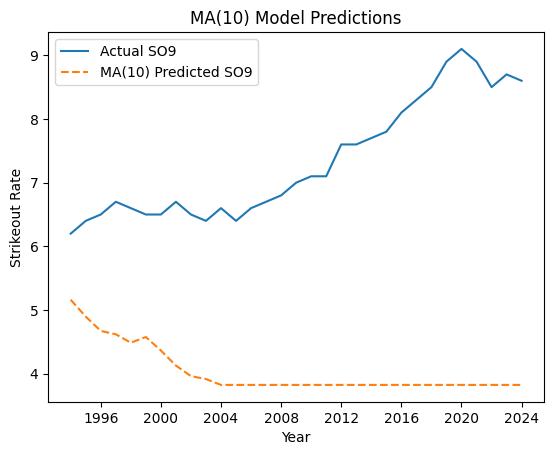

In [48]:
# even though we failed to converge, we can still see what the predictions look like:
ma_pred = ma_new_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
pred_data = pd.DataFrame({'Year': test_data.index, 'pred SO9': ma_pred.flatten()})
pred_data.set_index('Year', inplace = True)

plt.plot(test_data['SO9'], label = 'Actual SO9')
plt.plot(pred_data['pred SO9'], label = 'MA(10) Predicted SO9', linestyle = '--')
plt.xlabel('Year')
plt.ylabel('Strikeout Rate')
plt.legend()
plt.title('MA(10) Model Predictions')
plt.show();

In [49]:
# Doesn't seem the MA(q) models are doing very well with our baseball data
# What about some new data?

In [50]:
# Here are some daily mininum temperature data from Maine
data = pd.read_csv('me_temp_data.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data.set_index('Date', inplace = True)
data = data.dropna()
data.head()

,Min_Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


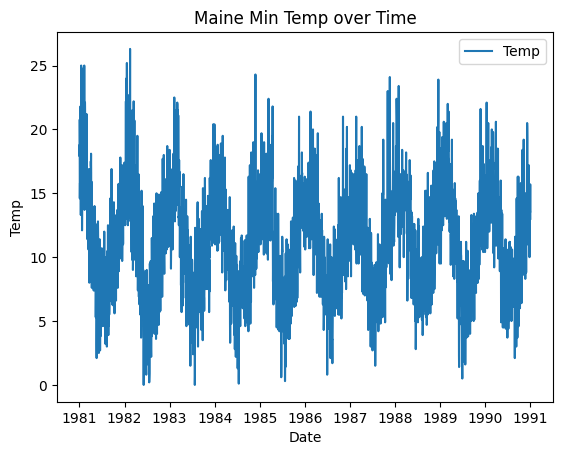

In [51]:
# visualize the time series
plt.plot(data['Min_Temp'], label='Temp')
plt.xlabel('Date')
plt.ylabel('Temp')
plt.legend()
plt.title('Maine Min Temp over Time')
plt.show();

<Axes: xlabel='Date'>

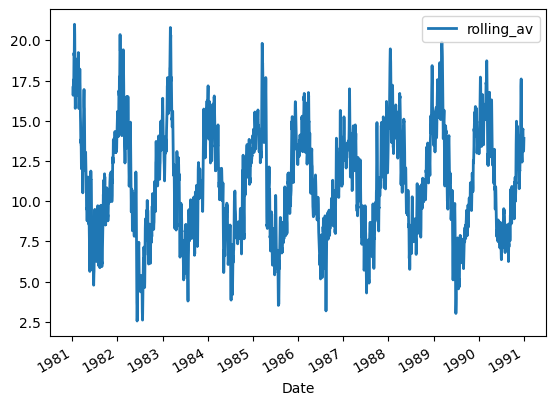

In [52]:
# sometimes a rolling average is helpful to visualize when you have very granular data
data.loc[:,'rolling_av'] = data.loc[:,'Min_Temp'].rolling(7).mean()
# data[['Min_Temp','rolling_av']].plot(lw=2); #both on top of each other (quick plot, no y label/title)
data[['rolling_av']].plot(lw=2) # just the rolling average (quick plot, no y label/title)

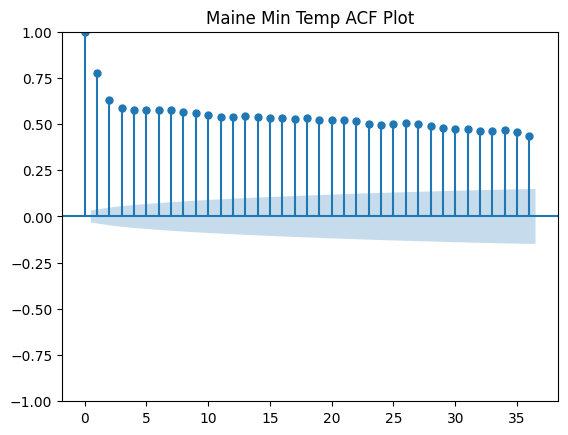

In [53]:
# check the acf plot
series = data['Min_Temp']
plot_acf(series, title = 'Maine Min Temp ACF Plot')
plt.show();

In [54]:
train_size = int(.9 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# put the y feature (the current SO9) in arrays
y_train = np.array(train_data['Min_Temp']).reshape(-1,1)
y_test = np.array(test_data['Min_Temp']).reshape(-1,1)

In [55]:
ma_model = ARIMA(y_train, order=(0, 0, 30)) # here is the MA(30) model (larger q may take longer to run)
ma_results = ma_model.fit()

#summary of the model
ma_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3285
Model:                ARIMA(0, 0, 30)   Log Likelihood               -7625.991
Date:                Tue, 04 Feb 2025   AIC                          15315.982
Time:                        14:41:36   BIC                          15511.090
Sample:                             0   HQIC                         15385.838
                               - 3285                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1500      0.262     42.536      0.000      10.636      11.664
ma.L1          0.6306      0.016     39.197      0.000       0.599       0.662
ma.L2          0.3186      0.019     16.656      0.000       0.281       0.356
ma.L3          0.2204      0.021     10.474      0.000       0.179       0.262
ma.L4          0.2006      0.021      9.354      0.000       0.159       0.243
ma.L5          0.2039      0.022      9.223      0.000       0.161       0.247
ma.L6          0.2010      0.022      9.089      0.000       0.158       0.244
ma.L7          0.2117      0.022      9.543      0.000       0.168       0.255
ma.L8          0.2096      0.022      9.331      0.000       0.166       0.254
ma.L9          0.2107      0.023      9.229      0.000       0.166       0.255
ma.L10         0.1875      0.023      8.055      0.000       0.142       0.233
ma.L11         0.1626      0.024      6.875      0.000       0.116       0.209
ma.L12         0.1576      0.024      6.627      0.000       0.111       0.204
ma.L13         0.1595      0.023      6.802      0.000       0.114       0.205
ma.L14         0.1513      0.023      6.447      0.000       0.105       0.197
ma.L15         0.1536      0.024      6.446      0.000       0.107       0.200
ma.L16         0.1460      0.024      6.067      0.000       0.099       0.193
ma.L17         0.1372      0.024      5.772      0.000       0.091       0.184
ma.L18         0.1647      0.023      7.119      0.000       0.119       0.210
ma.L19         0.1476      0.023      6.398      0.000       0.102       0.193
ma.L20         0.1468      0.023      6.353      0.000       0.102       0.192
ma.L21         0.1398      0.024      5.848      0.000       0.093       0.187
ma.L22         0.1321      0.023      5.745      0.000       0.087       0.177
ma.L23         0.0941      0.023      4.049      0.000       0.049       0.140
ma.L24         0.0751      0.023      3.239      0.001       0.030       0.120
ma.L25         0.0844      0.023      3.737      0.000       0.040       0.129
ma.L26         0.0990      0.021      4.734      0.000       0.058       0.140
ma.L27         0.0962      0.022      4.363      0.000       0.053       0.139
ma.L28         0.0922      0.022      4.254      0.000       0.050       0.135
ma.L29         0.0711      0.021      3.345      0.001       0.029       0.113
ma.L30         0.0082      0.018      0.456      0.648      -0.027       0.043
sigma2         6.0780      0.143     42.458      0.000       5.797       6.359
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.78
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.07
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.30
========================================================

In [56]:
# getting the predictions for first 30 days of the test data
ma_pred = ma_results.predict(start=len(train_data), end=len(train_data) + 30)
pred_data = pd.DataFrame({'Date': test_data.index[0:31], 'pred Min_Temp': ma_pred.flatten()})
pred_data.set_index('Date', inplace = True)
pred_data.head()

,pred Min_Temp
Date,
1990-01-01,12.077360
1990-01-02,12.175548
1990-01-03,12.204591
1990-01-04,12.280349
1990-01-05,12.317837


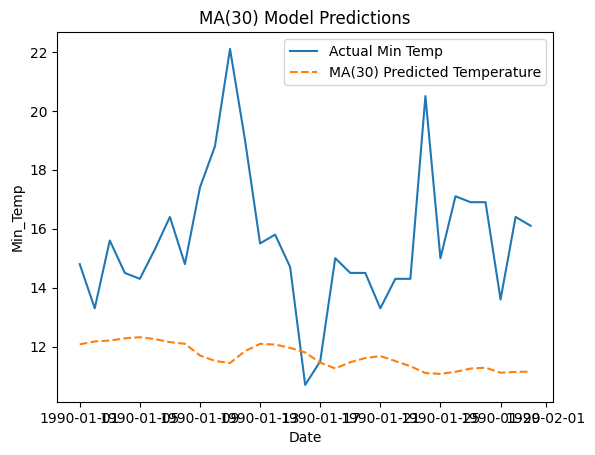

In [57]:
# make the plot
plt.plot(test_data['Min_Temp'][0:31], label = 'Actual Min Temp')
plt.plot(pred_data['pred Min_Temp'], label = 'MA(30) Predicted Temperature', linestyle = '--')
plt.xlabel('Date')
plt.ylabel('Min_Temp')
plt.legend()
plt.title('MA(30) Model Predictions')
plt.show();

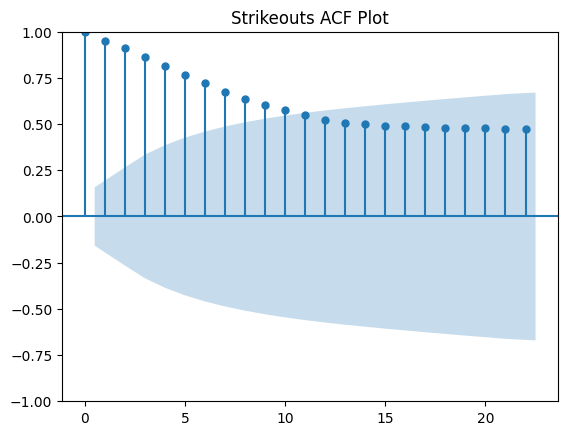

In [58]:
# using the ACF and PACF plots to help us confirm that the data we've been modeling is more Autoregressive than Moving Average
# Recall, if the ACF cuts off quickly -> MA(q)
# If the PACF cuts off quickly -> AR(p)

# For the baseball data
series = pitching['SO9']
plot_acf(series, title = 'Strikeouts ACF Plot')
plt.show();

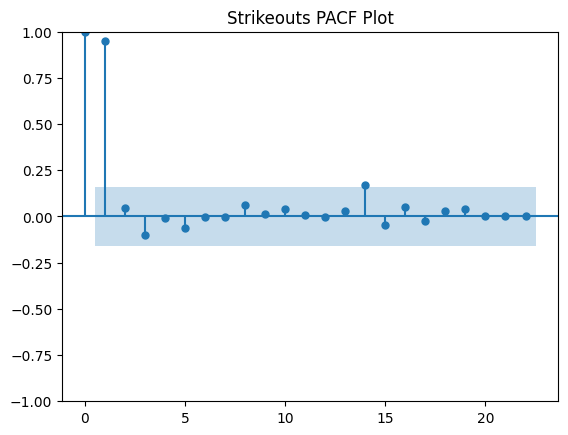

In [59]:
plot_pacf(series, title = 'Strikeouts PACF Plot')
plt.show();

In [60]:
# Seems AR(p) was better (that matches with what we saw!)


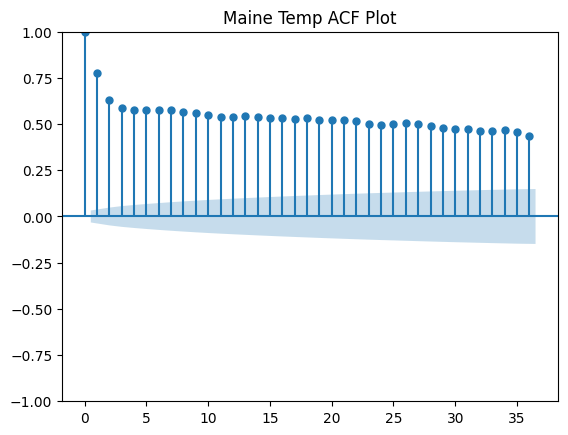

In [61]:
# What about the Maine Temp data?
series = data['Min_Temp']
plot_acf(series, title = 'Maine Temp ACF Plot')
plt.show();

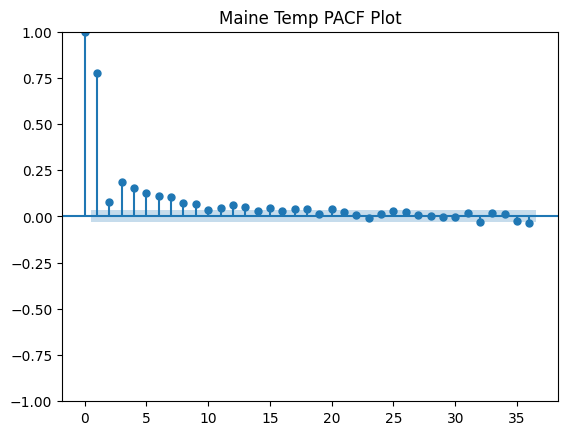

In [62]:
plot_pacf(series, title = 'Maine Temp PACF Plot')
plt.show();

In [63]:
# Also more likely to be AR(p), but perhaps a mixture (ARMA or ARIMA) would be okay, since there's still some PACF

### Practice: 
Check the Nvidia data and the Airline Data and determine which model you think would be more appropriate to use